In [39]:
dir_csv = '../input/rsna-intracranial-hemorrhage-detection'
dir_train_img = '../input/rsna-train-stage-1-images-png-224x/stage_1_train_png_224x'
dir_test_img = '../input/rsna-test-stage-1-images-png-224x/stage_1_test_png_224x'

In [40]:
dir_csv = dir_dcm = '/home/jupyter/rsna/source_data'
dir_train_img = '/home/jupyter/rsna/rsna-train-stage-1-images-png-224x/stage_1_train_png_224x'
dir_test_img = '/home/jupyter/rsna/rsna-train-stage-1-images-png-224x/stage_1_test_png_224x'


In [41]:
import os
from os import path
import cv2
import glob
import pydicom
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import sys
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [42]:
saved = 'saved'
if not path.exists(saved):
    os.mkdir(saved)

In [43]:
train = pd.read_csv(os.path.join(dir_csv, 'stage_1_train.csv'))
test = pd.read_csv(os.path.join(dir_csv, 'stage_1_sample_submission.csv'))

In [44]:
# Split train out into row per image and save a sample

train[['ID', 'Image', 'Diagnosis']] = train['ID'].str.split('_', expand=True)
train = train[['Image', 'Diagnosis', 'Label']]
train.drop_duplicates(inplace=True)
train = train.pivot(index='Image', columns='Diagnosis', values='Label').reset_index()
train['Image'] = 'ID_' + train['Image']
train.head()

Diagnosis,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0


In [45]:
# Some files didn't contain legitimate images, so we need to remove them

png = glob.glob(os.path.join(dir_train_img, '*.png'))
png = [os.path.basename(png)[:-4] for png in png]
png = np.array(png)

train = train[train['Image'].isin(png)]


In [46]:
train, val = train_test_split(train, test_size=0.1, random_state=42)

In [47]:
len(train), len(val)

(606831, 67426)

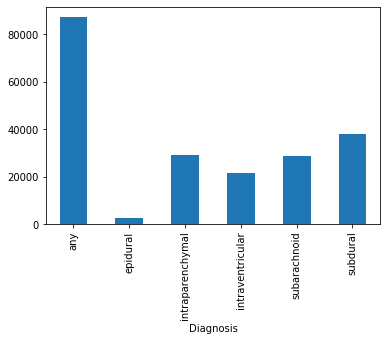

In [48]:
train.iloc[:, [1,2,3,4,5,6]].sum().plot(kind='bar')

In [49]:
train.iloc[:, [1,2,3,4,5,6]].sum()

Diagnosis
any                 87273
epidural             2494
intraparenchymal    29246
intraventricular    21416
subarachnoid        28820
subdural            38141
dtype: int64

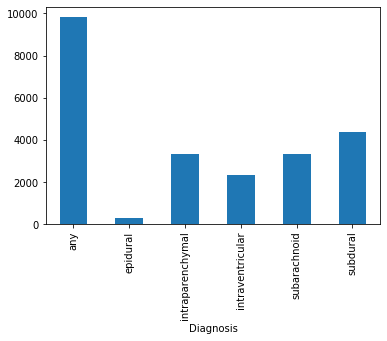

In [50]:
val.iloc[:, [1,2,3,4,5,6]].sum().plot(kind='bar')

In [51]:
val.iloc[:, [1,2,3,4,5,6]].sum()

Diagnosis
any                 9830
epidural             267
intraparenchymal    3318
intraventricular    2350
subarachnoid        3302
subdural            4355
dtype: int64

In [52]:
train.to_csv(f'{saved}/train.csv', index=False)
val.to_csv(f'{saved}/val.csv', index=False)

In [53]:
# Also prepare the test data

test[['ID','Image','Diagnosis']] = test['ID'].str.split('_', expand=True)
test['Image'] = 'ID_' + test['Image']
test = test[['Image', 'Label']]
test.drop_duplicates(inplace=True)

test.to_csv(f'{saved}/test.csv', index=False)

In [54]:
test.head()

,Image,Label
0,ID_28fbab7eb,0.5
6,ID_877923b8b,0.5
12,ID_a591477cb,0.5
18,ID_42217c898,0.5
24,ID_a130c4d2f,0.5
